In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [5]:
Uber_Data = pd.read_csv("C:/Users/sanidhya.singh/Desktop/DESK/training/Notebook Files/Uber Request Data.csv")

In [6]:
Uber_Data.head()

,Request_id,Pickup_point,Driver id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [7]:
Uber_Data.describe()

,Request_id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [8]:
# Checking Duplicates

sum(Uber_Data.duplicated(subset = "Request_id")) == 0

True

In [9]:
#checking null  values

print(Uber_Data.isnull().sum())
print("Total no. of missing values :", Uber_Data.isnull().values.sum())

Request_id              0
Pickup_point            0
Driver id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64
Total no. of missing values : 6564


In [10]:
#converting datatime

Uber_Data["Request_timestamp"] = Uber_Data["Request_timestamp"].astype(str)
Uber_Data['Request_timestamp'] = Uber_Data['Request_timestamp'].str.replace("/", "-")
Uber_Data['Request_timestamp'] = pd.to_datetime(Uber_Data["Request_timestamp"], dayfirst=True)


In [11]:
Uber_Data['Drop_timestamp'] = Uber_Data['Drop_timestamp'].astype(str)
Uber_Data['Drop_timestamp'] = Uber_Data['Drop_timestamp'].str.replace("/", "-")
Uber_Data['Drop_timestamp'] = pd.to_datetime(Uber_Data["Drop_timestamp"], dayfirst=True)


In [12]:
Uber_Data.head()

,Request_id,Pickup_point,Driver id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [13]:
Uber_Data['Trip_Time'] = (Uber_Data['Drop_timestamp'] - Uber_Data['Request_timestamp']).astype('timedelta64[m]')

In [14]:
Uber_Data.groupby((['Status','Pickup_point']), as_index=False)['Request_id'].count()

,Status,Pickup_point,Request_id
0,Cancelled,Airport,198
1,Cancelled,City,1066
2,No Cars Available,Airport,1713
3,No Cars Available,City,937
4,Trip Completed,Airport,1327
5,Trip Completed,City,1504


In [15]:
#Hour Column
Uber_Data['Req_hour'] = Uber_Data['Request_timestamp'].dt.hour

#Day Column
Uber_Data['Req_day'] = Uber_Data['Request_timestamp'].dt.day

In [16]:
Uber_Data.head()

,Request_id,Pickup_point,Driver id,Status,Request_timestamp,Drop_timestamp,Trip_Time,Req_hour,Req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,69.0,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.0,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.0,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.0,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.0,8,13


In [17]:
Uber_Data.groupby((['Req_day','Status']), as_index=False)['Request_id'].count()

,Req_day,Status,Request_id
0,11,Cancelled,262
1,11,No Cars Available,504
2,11,Trip Completed,601
3,12,Cancelled,240
4,12,No Cars Available,505
5,12,Trip Completed,562
6,13,Cancelled,270
7,13,No Cars Available,490
8,13,Trip Completed,577
9,14,Cancelled,252


In [18]:
Day_Analysis = Uber_Data.groupby((['Req_day','Req_hour','Status']), as_index=False)['Request_id'].count()

In [20]:
Uber_Data['Session'] = pd.cut(Uber_Data.Req_hour,[0,5,11,16,20,24],labels=['Late_Night','Morning','Afternoon','Evening','Night'])

Uber_Data.head()

,Request_id,Pickup_point,Driver id,Status,Request_timestamp,Drop_timestamp,Trip_Time,Req_hour,Req_day,Session
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,69.0,11,11,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.0,17,11,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.0,9,12,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.0,21,12,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.0,8,13,Morning


In [22]:
Uber_Data.groupby((['Session','Status']), as_index=False)['Request_id'].count()

,Session,Status,Request_id
0,Late_Night,Cancelled,238
1,Late_Night,No Cars Available,327
2,Late_Night,Trip Completed,359
3,Morning,Cancelled,744
4,Morning,No Cars Available,428
5,Morning,Trip Completed,900
6,Afternoon,Cancelled,91
7,Afternoon,No Cars Available,228
8,Afternoon,Trip Completed,491
9,Evening,Cancelled,124


In [144]:
Uber_Data.groupby((['Status','Session']), as_index=False)['Trip_Time'].count()

,Status,Session,Trip_Time
0,Cancelled,Late_Night,0
1,Cancelled,Morning,0
2,Cancelled,Afternoon,0
3,Cancelled,Evening,0
4,Cancelled,Night,0
5,No Cars Available,Late_Night,0
6,No Cars Available,Morning,0
7,No Cars Available,Afternoon,0
8,No Cars Available,Evening,0
9,No Cars Available,Night,0


In [23]:
Uber_Data.head()

,Request_id,Pickup_point,Driver id,Status,Request_timestamp,Drop_timestamp,Trip_Time,Req_hour,Req_day,Session
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,69.0,11,11,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.0,17,11,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.0,9,12,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.0,21,12,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.0,8,13,Morning


In [24]:
Uber_Data.Session.value_counts()

Morning       2072
Evening       1893
Night          947
Late_Night     924
Afternoon      810
Name: Session, dtype: int64

In [149]:
Uber_Data.groupby((['Driver id','Status']), as_index=False)['Trip_Time'].count()

,Driver id,Status,Trip_Time
0,1.0,Cancelled,0
1,1.0,Trip Completed,9
2,2.0,Cancelled,0
3,2.0,Trip Completed,9
4,3.0,Cancelled,0
5,3.0,Trip Completed,10
6,4.0,Cancelled,0
7,4.0,Trip Completed,10
8,5.0,Cancelled,0
9,5.0,Trip Completed,11


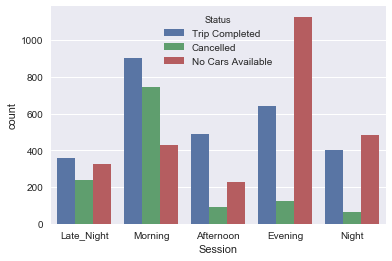

In [25]:
sns.countplot(x = 'Session', hue = 'Status', data = Uber_Data)
plt.show()

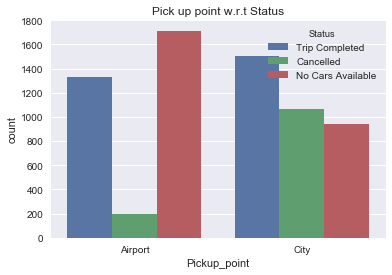

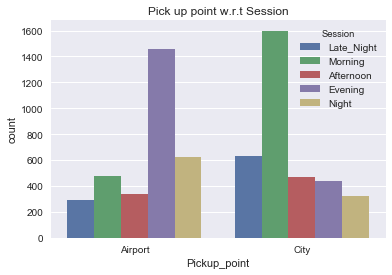

In [27]:
sns.countplot(x="Pickup_point", hue="Status", data = Uber_Data)
plt.title('Pick up point w.r.t Status')
plt.show()

sns.countplot(x="Pickup_point", hue="Session", data = Uber_Data)
plt.title('Pick up point w.r.t Session')
plt.show()

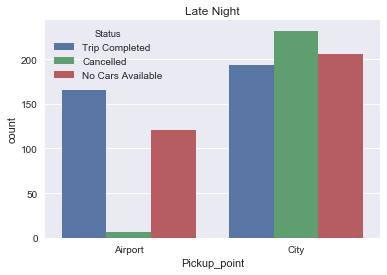

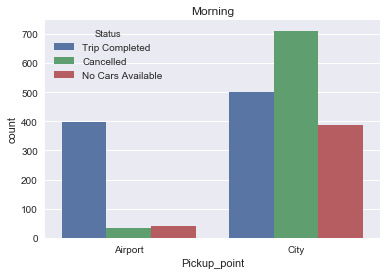

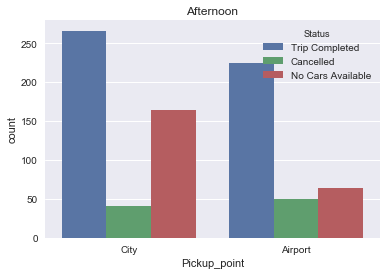

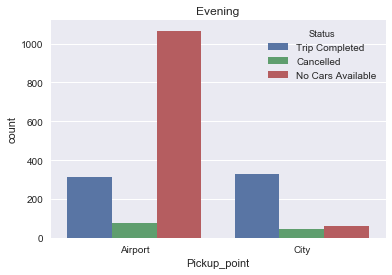

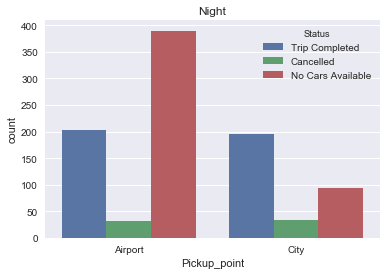

In [28]:
Late_Night = Uber_Data[Uber_Data.Session == "Late_Night"]
sns.countplot(x = "Pickup_point", hue = "Status", data = Late_Night)
plt.title('Late Night')
plt.show()


morning = Uber_Data[Uber_Data.Session == "Morning"]
sns.countplot(x = "Pickup_point", hue = "Status", data = morning)
plt.title('Morning')
plt.show()

Afternoon = Uber_Data[Uber_Data.Session == "Afternoon"]
sns.countplot(x = "Pickup_point", hue = "Status", data = Afternoon)
plt.title('Afternoon')
plt.show()


Evening = Uber_Data[Uber_Data.Session == "Evening"]
sns.countplot(x = "Pickup_point", hue = "Status", data = Evening)
plt.title('Evening')
plt.show()

Night = Uber_Data[Uber_Data.Session == "Night"]
sns.countplot(x = "Pickup_point", hue = "Status", data = Night)
plt.title('Night')
plt.show()


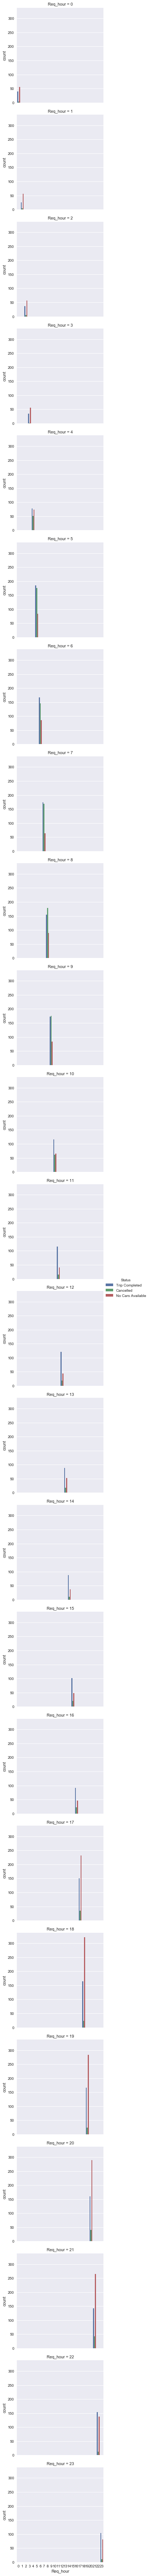

In [207]:
# plot of hour and day w.r.t. status

sns.factorplot(x = "Req_hour", hue = "Status", row = "Req_hour", data = Uber_Data, kind = "count")
plt.show()

           Blue  :  Pick up from AIRPORT 
           Green :  Pick up from CITY 


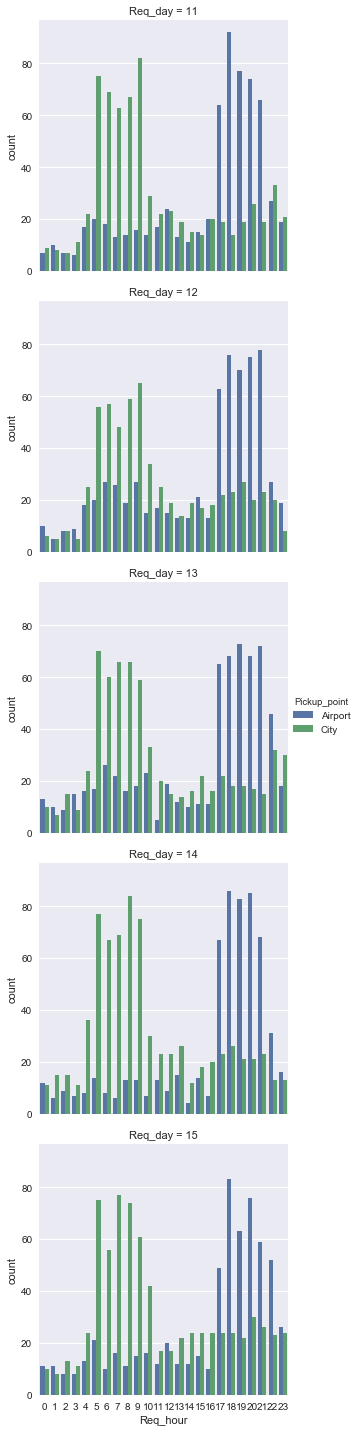

In [29]:
# plot of hour and day w.r.t. pickup point
print("           Blue  :  Pick up from AIRPORT ")
print("           Green :  Pick up from CITY ")
sns.factorplot(x = "Req_hour", hue = "Pickup_point", row = "Req_day", data = Uber_Data, kind = "count")

plt.show()

           Blue  :  Pick up from AIRPORT 
           Green :  Pick up from CITY 


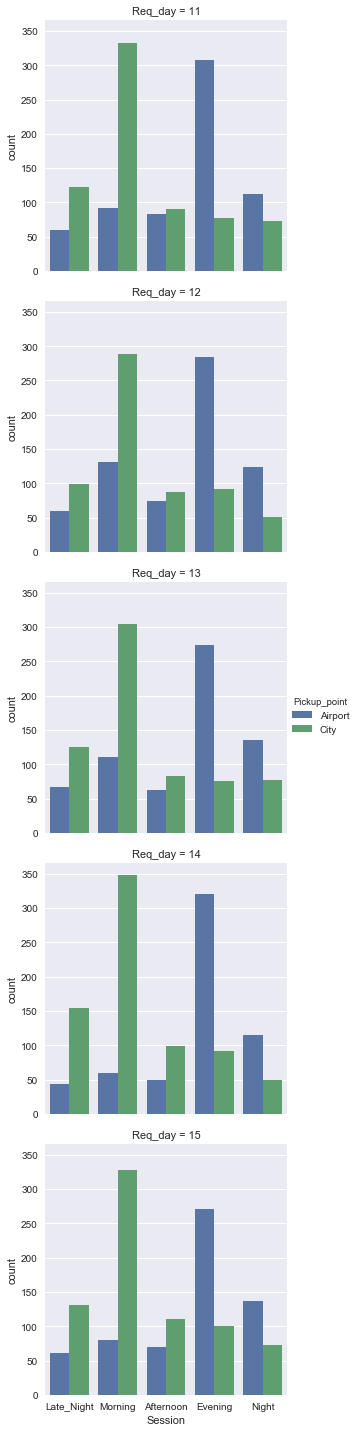

In [30]:
# plot of hour and day w.r.t. pickup point 

print("           Blue  :  Pick up from AIRPORT ")
print("           Green :  Pick up from CITY ")

sns.factorplot(x = "Session", hue = "Pickup_point", row = "Req_day", data = Uber_Data, kind = "count")

plt.show()